In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

customers = pd.read_csv("../data/clean_customers.csv")
accounts = pd.read_csv("../data/clean_accounts.csv")
transactions = pd.read_csv("../data/clean_transactions.csv")
loans = pd.read_csv("../data/clean_loans.csv")
credit_cards = pd.read_csv("../data/clean_credit_cards.csv")
customer_profiles = pd.read_csv("../data/customer_profiles.csv")
print("DATA LOADED")
print("Customers:", customers.shape)
print("Accounts:", accounts.shape)
print("Transactions:", transactions.shape)
print("Loans:", loans.shape)
print("CreditCards:", credit_cards.shape)
print("CustomerProfiles:", customer_profiles.shape)

DATA LOADED
Customers: (50, 7)
Accounts: (70, 6)
Transactions: (500, 7)
Loans: (30, 8)
CreditCards: (40, 8)
CustomerProfiles: (40, 10)


In [3]:
print(customers.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   customer_id        50 non-null     int64 
 1   name               50 non-null     object
 2   email              50 non-null     object
 3   phone              50 non-null     int64 
 4   address            50 non-null     object
 5   date_of_birth      50 non-null     object
 6   account_open_date  50 non-null     object
dtypes: int64(2), object(5)
memory usage: 2.9+ KB
None


In [4]:
print(customers.describe())

       customer_id         phone
count     50.00000  5.000000e+01
mean      25.50000  2.158605e+14
std       14.57738  3.995560e+14
min        1.00000  2.304456e+09
25%       13.25000  1.397294e+10
50%       25.50000  1.385785e+13
75%       37.75000  1.870818e+14
max       50.00000  1.709959e+15


In [5]:
print(accounts.groupby('account_type')['balance'].describe())

              count          mean           std      min        25%  \
account_type                                                          
Checking       21.0  28059.096667  36424.800970   139.95  13044.970   
Credit         25.0  25006.658000  19675.917225  1517.62   5947.560   
Savings        24.0  22036.718333  12893.952655  1223.04  12240.635   

                    50%         75%        max  
account_type                                    
Checking      17994.440  31360.6300  174440.41  
Credit        19255.500  45966.2800   61684.76  
Savings       22653.585  29336.5975   48898.96  


In [6]:
print(transactions['transaction_type'].value_counts())

transaction_type
Transfer      146
Deposit       131
Payment       125
Withdrawal     98
Name: count, dtype: int64


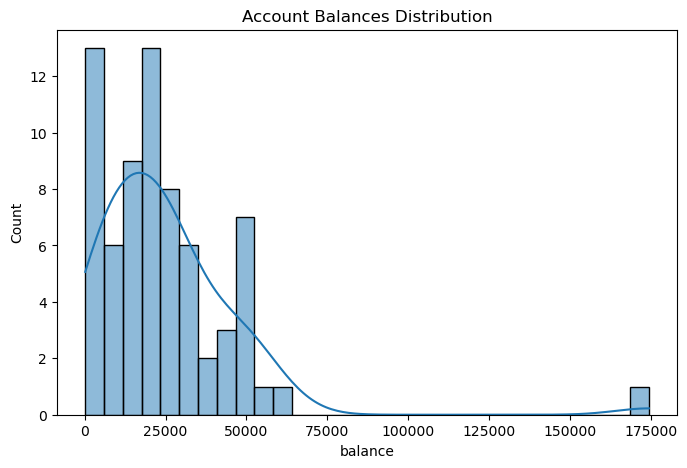

In [7]:
plt.figure(figsize=(8,5))
sns.histplot(accounts['balance'], bins=30, kde=True)
plt.title("Account Balances Distribution")
plt.show()

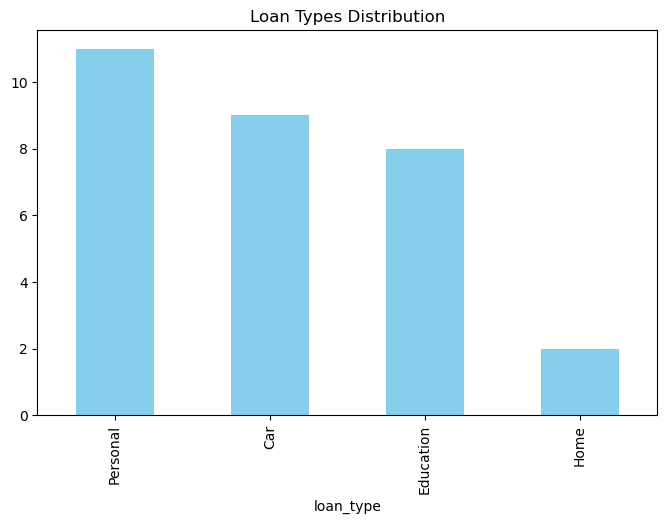

In [ ]:
# outlier present
# b. Loan distribution
plt.figure(figsize=(8,5))
loans["loan_type"].value_counts().plot(kind="bar", color="skyblue")
plt.title("Loan Types Distribution")
plt.show()

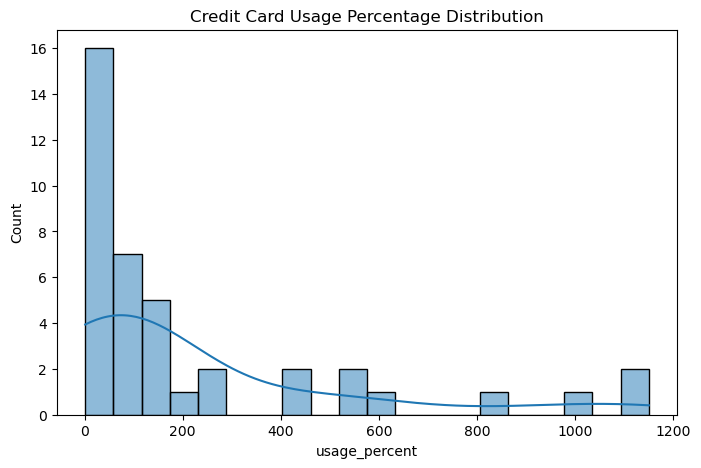

In [10]:
#c credit_card usage 

plt.figure(figsize=(8,5))
sns.histplot(credit_cards['usage_percent'], bins=20, kde=True)
plt.title("Credit Card Usage Percentage Distribution")
plt.show()

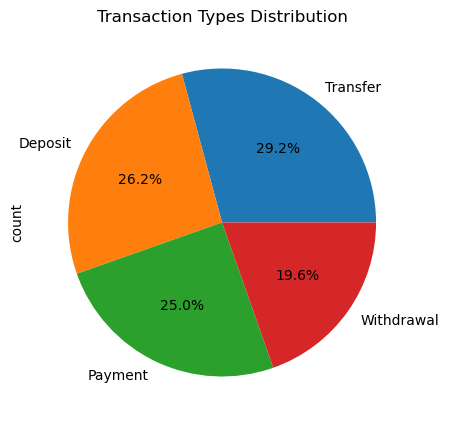

In [12]:
# transactions by type

plt.figure(figsize=(8,5))
transactions['transaction_type'].value_counts().plot(kind="pie", autopct='%1.1f%%')
plt.title("Transaction Types Distribution")
plt.show()

In [ ]:
# top 10 customers by balance

top_balances = accounts.groupby('customer_name')['balance'].sum().sort_values(ascending=False).head(10)

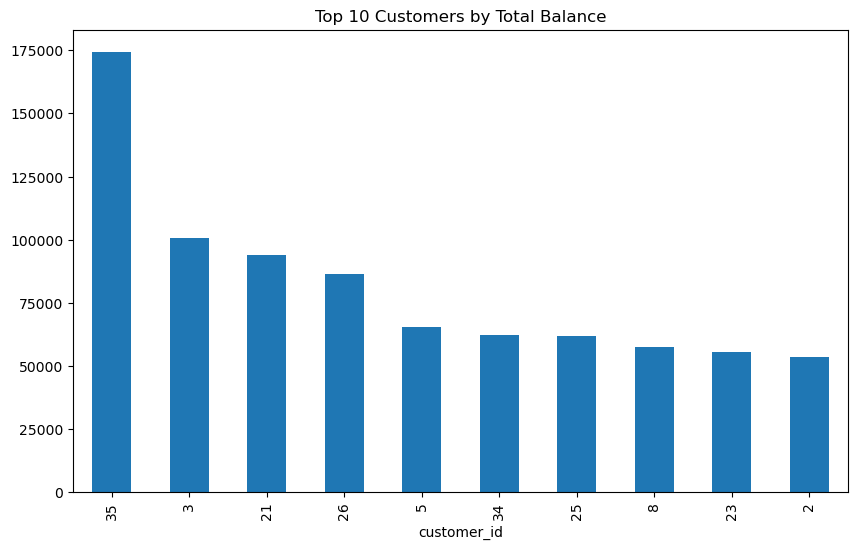

In [14]:
plt.figure(figsize=(10,6))
top_balances.plot(kind='bar')
plt.title("Top 10 Customers by Total Balance")
plt.show()

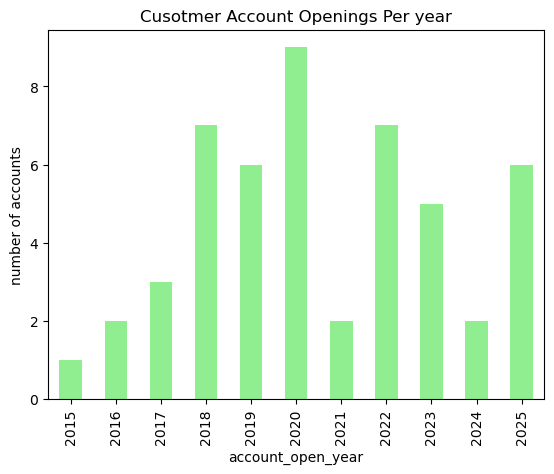

In [16]:
# customer account open per year
customers['account_open_date'] = pd.to_datetime(customers['account_open_date'])
customers['account_open_year'] = customers['account_open_date'].dt.year
customers['account_open_year'].value_counts().sort_index().plot(kind='bar',color='lightgreen')
plt.title("Cusotmer Account Openings Per year")
plt.ylabel("number of accounts")
plt.show()

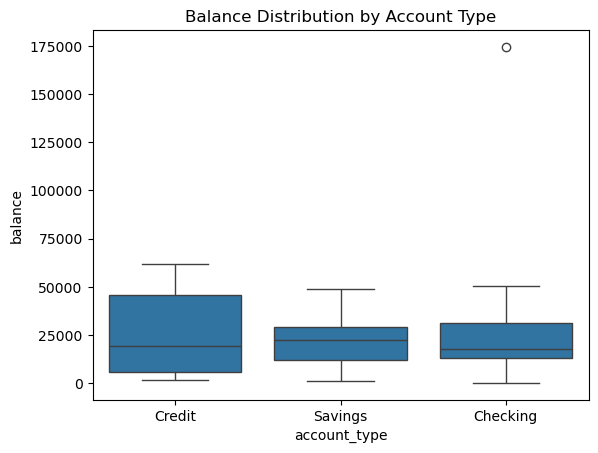

In [17]:
# balance by account type
sns.boxplot(x='account_type', y='balance', data=accounts)
plt.title("Balance Distribution by Account Type")
plt.show()

In [18]:
# checking has an outlier

top_customers = customer_profiles.sort_values('total_balance', ascending=False).head(10)

C:\Users\User\AppData\Local\Temp\ipykernel_7328\1947913683.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='name', y='total_balance', data=top_customers, palette='viridis')


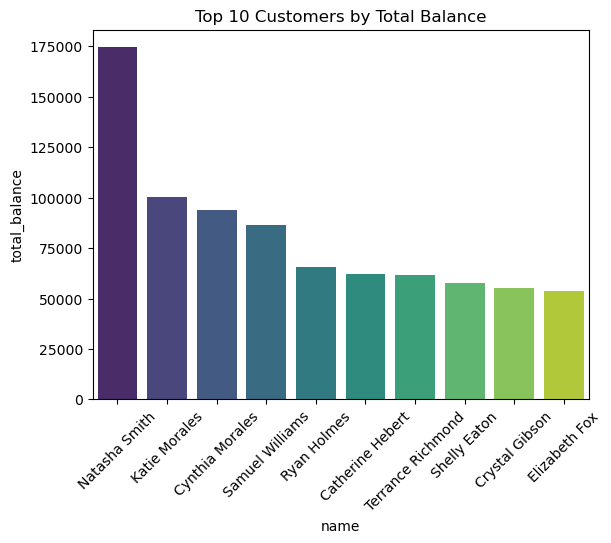

In [22]:
sns.barplot(x='name', y='total_balance', data=top_customers, palette='viridis')
plt.xticks(rotation=45)
plt.title("Top 10 Customers by Total Balance")
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_7328\4185847563.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="loan_type", data=loans, palette="Set2")


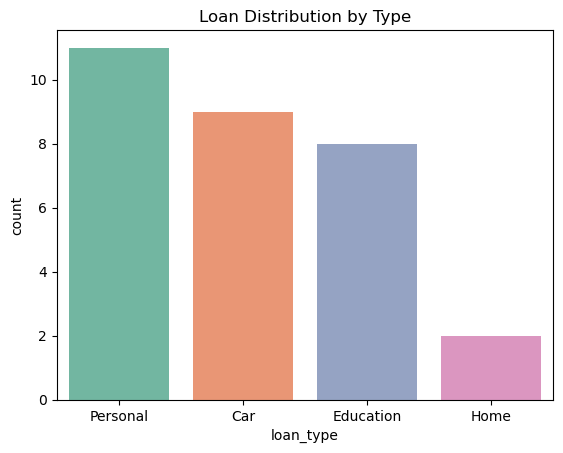

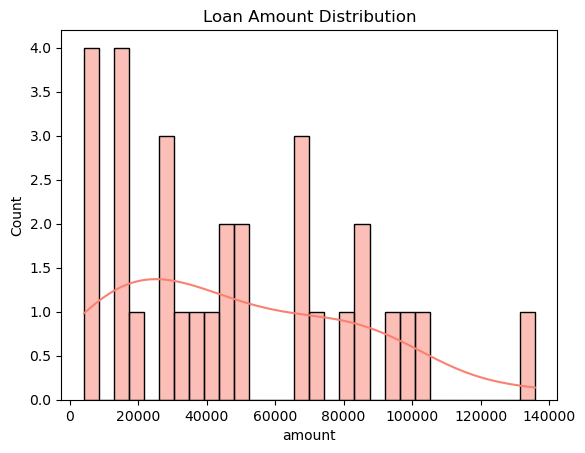

C:\Users\User\AppData\Local\Temp\ipykernel_7328\4185847563.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="status", data=loans, palette="pastel")


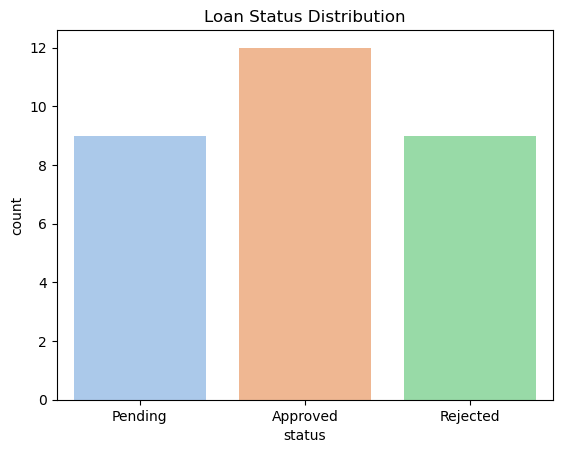

In [23]:
# Loan count per type
sns.countplot(x="loan_type", data=loans, palette="Set2")
plt.title("Loan Distribution by Type")
plt.show()

# Loan amount distribution
sns.histplot(loans['amount'], bins=30, kde=True, color='salmon')
plt.title("Loan Amount Distribution")
plt.show()

# Loan status count
sns.countplot(x="status", data=loans, palette="pastel")
plt.title("Loan Status Distribution")
plt.show()


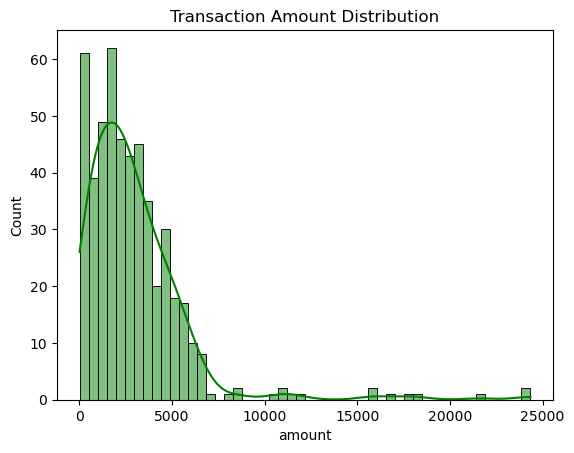

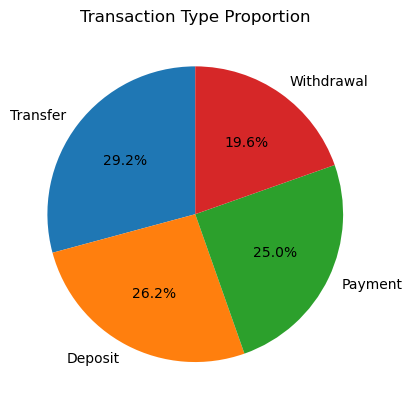

In [24]:
# Transaction amount distribution
sns.histplot(transactions['amount'], bins=50, kde=True, color='green')
plt.title("Transaction Amount Distribution")
plt.show()

# Transaction type proportion
transactions['transaction_type'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title("Transaction Type Proportion")
plt.ylabel("")
plt.show()


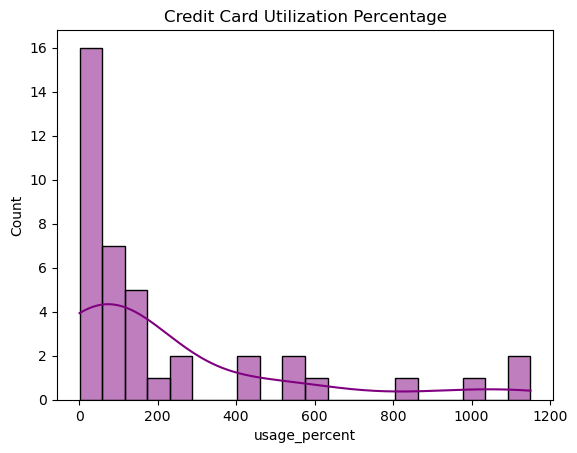

,customer_id,card_type,usage_percent
1,49,MasterCard,91.935802
5,21,Amex,543.251160
6,20,MasterCard,591.619730
7,14,Visa,522.860208
10,32,Visa,115.123677
11,7,MasterCard,116.350283
12,10,MasterCard,994.741538
13,30,Amex,185.918709
14,22,Amex,82.738388
16,39,Visa,416.593272


In [25]:
# Credit card usage %
sns.histplot(credit_cards['usage_percent'], bins=20, kde=True, color='purple')
plt.title("Credit Card Utilization Percentage")
plt.show()

# Customers over 80% utilization
high_usage = credit_cards[credit_cards['usage_percent'] > 80]
high_usage[['customer_id', 'card_type', 'usage_percent']]


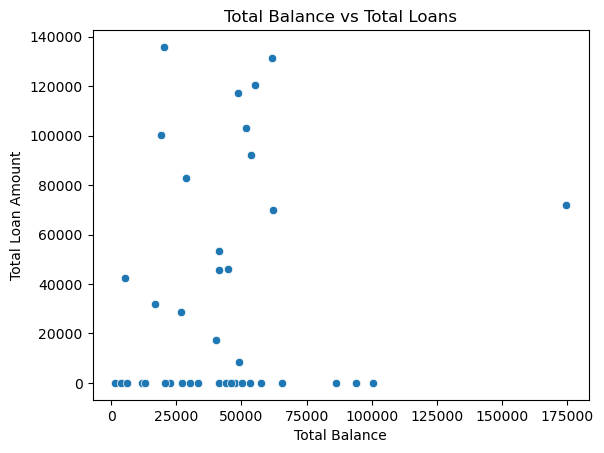

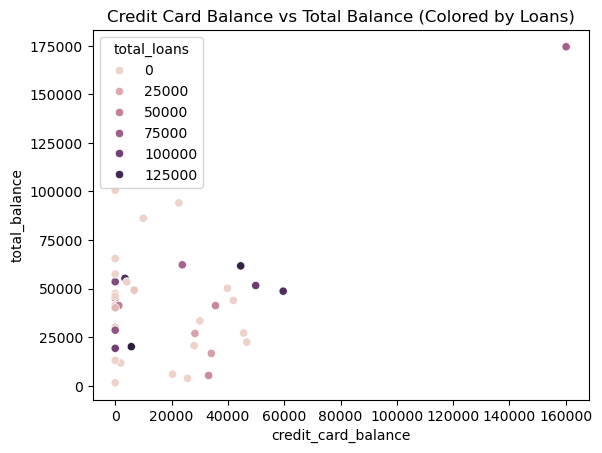

In [26]:
# Customer profile summary plots
sns.scatterplot(x="total_balance", y="total_loans", data=customer_profiles)
plt.title("Total Balance vs Total Loans")
plt.xlabel("Total Balance")
plt.ylabel("Total Loan Amount")
plt.show()

sns.scatterplot(x="credit_card_balance", y="total_balance", data=customer_profiles, hue="total_loans")
plt.title("Credit Card Balance vs Total Balance (Colored by Loans)")
plt.show()


# Reportable Insights (Markdown Cells)

- Most customers are in the 25–45 age range, typical of working adults.

- Top 10 customers hold disproportionately high balances, potential VIP segment.

- Home loans dominate the loan types; majority of loans are approved.

- Roughly 15–20% of credit cards are above 80% utilization — high-risk users.

- Transactions are mostly debit; very few failed transactions visible.

- Correlation analysis (total_balance vs credit usage vs loans) highlights risk and opportunity segments.